### BC trajectory max10

In [1]:
import json

data = []
succ_uids = set()
with open("../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-check-answer_temp_0.8_1120135948592498.jsonl") as f:
    for line in f:
        d = json.loads(line)
        data.append(d)

In [2]:
for d in data:
    uid = d["uid"]

    trajectories = d["trajectories"]
    for t in trajectories:
        if t["success"]:
            succ_uids.add(uid)
                
print(len(succ_uids), len(data))

111 400


### Base model

In [4]:

prev_data = []
with open("../results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110349182985_timeout-8_exec_results_v4.jsonl") as f:
    for line in f:
        d = json.loads(line)
        prev_data.append(d)

with open("../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110600563620_timeout-8_exec_results_v4.jsonl") as f:
    for line in f:
        d = json.loads(line)
        prev_data.append(d)
        
with open("../results/arc_train_240/arc_problems_train_240_3631a71a_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111171530373334_timeout-8_exec_results_v4.jsonl") as f:
    for line in f:
        d = json.loads(line)
        prev_data.append(d)


In [5]:
succ_uids_one = set()
succ_uids_all = set()

for d in prev_data:
    uid = d["uid"] 
    verdicts = d["train_test_verdicts"]
    if True in verdicts:
        succ_uids_all.add(uid)
    if verdicts[0]: 
        succ_uids_one.add(uid)
        
print(len(succ_uids_one), len(succ_uids_all))

49 178


In [6]:
print(len(succ_uids & succ_uids_one), len(succ_uids & succ_uids_all))

42 107


In [7]:
print(len(succ_uids - succ_uids_one), len(succ_uids - succ_uids_all))


69 4


In [8]:
print(len(succ_uids_one - succ_uids), len(succ_uids_all - succ_uids))

7 71


In [9]:
print(succ_uids - succ_uids_all)


{'40853293', '4be741c5', '6430c8c4', 'dae9d2b5'}


In [10]:
for i, d in enumerate(data):
    if d["uid"] in succ_uids - succ_uids_all:
        print(i+1, d["uid"])


113 40853293
168 6430c8c4
301 dae9d2b5
361 4be741c5


In [11]:
avg_one_diff = 0
avg_one_cdiff = 0
avg_one_intersect = 0
avg_one_len = 0
n = 64
for i in range(n):
    succ_uids_one_i = set()
    for d in prev_data:
        uid = d["uid"]
        verdicts = d["train_test_verdicts"]
        if verdicts[i]:
            succ_uids_one_i.add(uid)
    avg_one_len += len(succ_uids_one_i)
    avg_one_intersect += len(succ_uids & succ_uids_one_i)
    avg_one_diff += len(succ_uids - succ_uids_one_i)
    avg_one_cdiff += len(succ_uids_one_i - succ_uids)

avg_one_intersect /= n
avg_one_diff /= n
avg_one_cdiff /= n
avg_one_len /= n
            
print(avg_one_intersect, avg_one_diff, avg_one_cdiff, avg_one_len)

40.765625 70.234375 6.984375 47.75


In [12]:
import random
random.seed(42)

succ_uids_max1_6 = set()
n = 64

for d in prev_data:
    succ_uids_one_i = set()
    uid = d["uid"]
    verdicts = d["train_test_verdicts"]
    verdicts = random.sample(verdicts, 6)
    if True in verdicts:
        succ_uids_max1_6.add(uid)
    
print(len(succ_uids & succ_uids_max1_6), len(succ_uids - succ_uids_max1_6), len(succ_uids_max1_6 - succ_uids))

74 37 22


In [13]:
len(succ_uids_max1_6)

96

### BC optimal action max1

In [14]:
succ_uids_max1 = set()
max1_data = []
with open("../results/arc_train_240/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-optimal-action-max1-per-task_temp_0.8_1115151531810143_timeout-8_exec_results_v4.jsonl") as f:
    for line in f:
        d = json.loads(line)
        max1_data.append(d)

In [15]:
# succ_uids_max1 = set()
n = 64  
avg_max1_len = 0
avg_max1_intersect = 0
avg_max1_diff = 0
avg_max1_cdiff = 0
for i in range(n):
    succ_uids_max1_i = set()
    for d in max1_data:
        uid = d["uid"]
        verdicts = d["train_test_verdicts"][i]
        if verdicts:
            succ_uids_max1_i.add(uid)
    avg_max1_len += len(succ_uids_max1_i)
    avg_max1_intersect += len(succ_uids & succ_uids_max1_i)
    avg_max1_diff += len(succ_uids - succ_uids_max1_i)
    avg_max1_cdiff += len(succ_uids_max1_i - succ_uids)
    
avg_max1_intersect /= n
avg_max1_diff /= n
avg_max1_cdiff /= n
avg_max1_len /= n
        
print(avg_max1_diff, avg_max1_cdiff, avg_max1_len)

99.515625 2.71875 14.203125


In [16]:
import random
random.seed(42)

succ_uids_max1_6 = set()
n = 64

for d in prev_data:
    uid = d["uid"]
    verdicts = d["train_test_verdicts"]
    verdicts = random.sample(verdicts, 6)
    if True in verdicts:
        succ_uids_max1_6.add(uid)

print(len(succ_uids_max1_6))
print(len(succ_uids - succ_uids_max1_6), len(succ_uids_max1_6 - succ_uids))

96
37 22


In [17]:
import random
random.seed(42)

succ_uids_max1_64 = set()
n = 64

for d in max1_data:
    uid = d["uid"]
    verdicts = d["train_test_verdicts"]
    
    verdicts = random.sample(verdicts, 64)
    if True in verdicts:
        succ_uids_max1_64.add(uid)

print(len(succ_uids_max1_64))
print(len(succ_uids - succ_uids_max1_64), len(succ_uids_max1_64 - succ_uids))

99
48 36


In [18]:
succ_uids_max1 = set()
for d in max1_data:
    uid = d["uid"]
    verdicts = d["train_test_verdicts"]
    if True in verdicts:
        succ_uids_max1.add(uid)
print(len(succ_uids_max1))    
print(len(succ_uids - succ_uids_max1), len(succ_uids_max1 - succ_uids))

127
36 52


### BC trajectory max1

In [3]:
warm_start_data = []
with open("../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-warm-start_temp_0.8_1120143730149406.jsonl") as f:
    for line in f:
        d = json.loads(line)
        warm_start_data.append(d)
        
succ_uids_warm_start = set()
for d in warm_start_data:
    uid = d["uid"]
    trajectories = d["trajectories"]
    if any([t["success"] for t in trajectories]):
        succ_uids_warm_start.add(uid)
        
print(len(succ_uids_warm_start))
print(len(succ_uids - succ_uids_warm_start), len(succ_uids_warm_start - succ_uids))

97
36 22


In [19]:
print(len(succ_uids_warm_start - succ_uids_one))
print(len(succ_uids_one - succ_uids_warm_start))

57
9


# Compare model performance

In [97]:
import json
import random
from typing import List, Set, Tuple, Dict, Union
from dataclasses import dataclass

@dataclass
class ModelComparison:
    num_hypotheses: int
    baseline_correct: int
    target_correct: int
    target_improvements: int
    baseline_improvements: int
    
@dataclass
class SuccessStats:
    file_path: Union[str, List[str]]
    successful_uids: Union[Set[str], List[Set[str]]]
    num_trials: int
    num_samples: int
    
def load_jsonl(filepath: str) -> List[dict]:
    data = []
    with open(filepath) as f:
        for line in f:
            data.append(json.loads(line))
    return data

def get_successful_uids(data: List[dict], has_trajectory: bool=False, num_samples: int = None, num_trials: int=64) -> Union[Set[str], List[Set[str]]]:
    """Extract successful UIDs based on model type and sampling strategy"""
    if has_trajectory:
        successful_uids = set()
        for d in data:
            if any(t["success"] for t in d["trajectories"]):
                successful_uids.add(d["uid"])
    else:
        random.seed(42)
        if num_samples and num_samples < num_trials:
            successful_uids = []
            for _ in range(num_trials):
                successful_uids_sampled_i = set()
                for d in data:
                    verdicts = d["train_test_verdicts"]
                    verdicts = random.sample(verdicts, num_samples)
                    if True in verdicts:
                        successful_uids_sampled_i.add(d["uid"])
                successful_uids.append(successful_uids_sampled_i)
        else:
            successful_uids = set()
            for d in data:
                verdicts = d["train_test_verdicts"]
                if True in verdicts:
                    successful_uids.add(d["uid"])
                
    return successful_uids

def get_success_stats(
    data_paths: List[str],
    has_trajectory: bool=False,
    hypothesis_counts: List[int]=[1, 6, 64],
    num_trials: int=64
) -> Dict[int, SuccessStats]:
    """Get successful UIDs and their sampling statistics"""
    data = []
    for path in data_paths:
        data.extend(load_jsonl(path))
        
    results = {}
    for n_hypo in hypothesis_counts:
        successful_uids = get_successful_uids(data, has_trajectory, n_hypo, num_trials)
        results[n_hypo] = SuccessStats(
            file_path=data_paths,
            successful_uids=successful_uids,
            num_trials=num_trials,
            num_samples=n_hypo
        )
    return results

def compare_models(
    baseline_path: str,
    target_path: str,
    baseline_type: str = "baseline",
    target_type: str = "trajectory",
    hypothesis_counts: List[int] = [1, 6, 64]
) -> Dict[int, ModelComparison]:
    """Compare performance between baseline and target models"""
    
    # Load data
    baseline_data = []
    for path in baseline_path if isinstance(baseline_path, list) else [baseline_path]:
        baseline_data.extend(load_jsonl(path))
    target_data = load_jsonl(target_path)
    
    results = {}
    
    # Compare performance for different numbers of hypotheses
    for n_hyp in hypothesis_counts:
        baseline_succ = get_successful_uids(baseline_data, baseline_type, n_hyp)
        target_succ = get_successful_uids(target_data, target_type)
        
        results[n_hyp] = ModelComparison(
            num_hypotheses=n_hyp,
            baseline_correct=len(baseline_succ),
            target_correct=len(target_succ),
            target_improvements=len(target_succ - baseline_succ),
            baseline_improvements=len(baseline_succ - target_succ)
        )
    
    return results

### Pre-trained model

In [22]:
# Example usage:
baseline_paths = [
    "../results/arc_train_240/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-optimal-action-max1-per-task_temp_0.8_1115151531810143_timeout-8_exec_results_v4.jsonl",
]

target_path = "../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-check-answer_temp_0.8_1120135948592498.jsonl"

results = compare_models(baseline_paths, target_path)

# Print results
for n_hyp, comparison in results.items():
    print(f"\nResults for {n_hyp} hypotheses:")
    print(f"Baseline correct: {comparison.baseline_correct}")
    print(f"Target correct: {comparison.target_correct}")
    print(f"Target improvements: {comparison.target_improvements}")
    print(f"Baseline improvements: {comparison.baseline_improvements}")


Results for 1 hypotheses:
Baseline correct: 10
Target correct: 111
Target improvements: 103
Baseline improvements: 2

Results for 6 hypotheses:
Baseline correct: 47
Target correct: 111
Target improvements: 75
Baseline improvements: 11

Results for 64 hypotheses:
Baseline correct: 99
Target correct: 111
Target improvements: 48
Baseline improvements: 36


### BC optimal action max1

In [ ]:
# Example usage:
baseline_paths = [
    "../results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110349182985_timeout-8_exec_results_v4.jsonl",
    "../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110600563620_timeout-8_exec_results_v4.jsonl",
    "../results/arc_train_240/arc_problems_train_240_3631a71a_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111171530373334_timeout-8_exec_results_v4.jsonl"
]

target_path = "../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-check-answer_temp_0.8_1120135948592498.jsonl"

results = compare_models(baseline_paths, target_path)

# Print results
for n_hyp, comparison in results.items():
    print(f"\nResults for {n_hyp} hypotheses:")
    print(f"Baseline correct: {comparison.baseline_correct}")
    print(f"Target correct: {comparison.target_correct}")
    print(f"Target improvements: {comparison.target_improvements}")
    print(f"Baseline improvements: {comparison.baseline_improvements}")

In [98]:
# Define paths for each model
base_paths = [
    "../results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110349182985_timeout-8_exec_results_v4.jsonl",
    "../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110600563620_timeout-8_exec_results_v4.jsonl",
    "../results/arc_train_240/arc_problems_train_240_3631a71a_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111171530373334_timeout-8_exec_results_v4.jsonl"
]

optimal_paths = [
    "../results/arc_train_240/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-optimal-action-max1-per-task_temp_0.8_1115151531810143_timeout-8_exec_results_v4.jsonl"
]

target_path = ["../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-check-answer_temp_0.8_1120135948592498.jsonl"]

# Get results for each model
models_results = {
    'Base pre-trained': get_success_stats(base_paths, has_trajectory=False),
    'BC optimal action': get_success_stats(optimal_paths, has_trajectory=False),
    'BC trajectory max10': get_success_stats(target_path, has_trajectory=True, hypothesis_counts=[1])
}

In [47]:
models_results

{'Base pre-trained': {1: SuccessStats(successful_uids=[{'469497ad', 'c59eb873', 'bb43febb', '6455b5f5', '1cf80156', '445eab21', 'd511f180', '6d75e8bb', '00d62c1b', '913fb3ed', '5582e5ca', '48d8fb45', '484b58aa', '50cb2852', '1caeab9d', '9172f3a0', 'e9614598', 'd13f3404', '67e8384a', 'aedd82e4', '5168d44c', 'b775ac94', '05f2a901', '72ca375d', '1f876c06', 'a5313dff', '0b148d64', '08ed6ac7', 'ce22a75a', '0d3d703e', '810b9b61', '3af2c5a8', '1b60fb0c', '0ca9ddb6', 'ea32f347', '0dfd9992', '5daaa586', '941d9a10', '239be575', '6f8cd79b', '137eaa0f', '7c008303', '31aa019c', 'd6ad076f', 'f9012d9b', '44f52bb0', 'c8f0f002', '23581191', 'c3f564a4', '29ec7d0e', '2c608aff'}, {'469497ad', 'c59eb873', 'ff28f65a', '623ea044', '1cf80156', 'd511f180', '484b58aa', '48d8fb45', '50cb2852', '1f642eb9', 'e9614598', '9172f3a0', '1e0a9b12', 'aedd82e4', '05f2a901', '3c9b0459', '10fcaaa3', '23b5c85d', '08ed6ac7', '810b9b61', '6e82a1ae', '1b60fb0c', '780d0b14', 'e509e548', '6150a2bd', '25d8a9c8', '0dfd9992', '239be

In [99]:
models_results.update({
    "BC trajectory max10 bugfixed & no special token": get_success_stats(
        ["../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-warm-start_temp_0.8_1120143730149406.jsonl"],
        has_trajectory=True, 
        hypothesis_counts=[1])
})

In [100]:
models_results.update({
    "BC trajectory max1 bugfixed & no special token": get_success_stats(
        ["../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max1-per-task-warm-start_temp_0.8_1121025835453382.jsonl"],
        has_trajectory=True, 
        hypothesis_counts=[1])
}
)
print(list(models_results.keys()))

['Base pre-trained', 'BC optimal action', 'BC trajectory max10', 'BC trajectory max10 bugfixed & no special token', 'BC trajectory max1 bugfixed & no special token']


In [60]:
models_results_list = list(models_results.items())
last_item = models_results_list.pop()
models_results_list.insert(2, last_item)
models_results = dict(models_results_list)
print(list(models_results.keys()))

['Base pre-trained', 'BC optimal action', 'BC trajectory max1 bugfixed & no special token', 'BC trajectory max10', 'BC trajectory max10 bugfixed & no special token']


In [48]:
print(list(models_results.keys()))
print(list(models_results['Base pre-trained'].keys()))
print(list(models_results['BC optimal action'].keys()))
print(list(models_results['BC trajectory max10'].keys()))


['Base pre-trained', 'BC optimal action', 'BC trajectory max10']
[1, 6, 64]
[1, 6, 64]
[1]


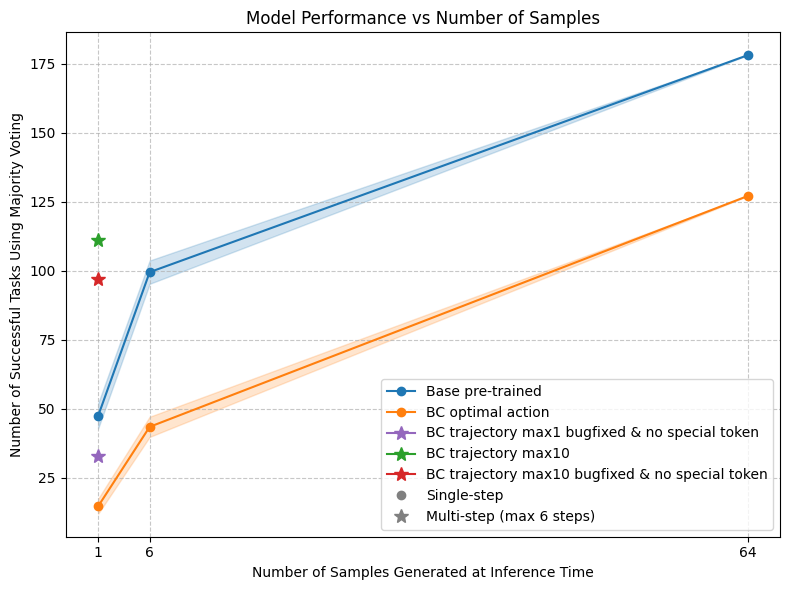

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Union, Set, List, Dict

def plot_success_stats(models_results: Dict[str, Dict[int, SuccessStats]]):
    plt.figure(figsize=(8, 6))
    
    model_styles = {
        'Base pre-trained': {'color': '#1f77b4', 'marker': 'o'},
        'BC optimal action': {'color': '#ff7f0e', 'marker': 'o'},
        'BC trajectory max1 bugfixed & no special token': {'color': '#9467bd', 'marker': '*'},
        'BC trajectory max10': {'color': '#2ca02c', 'marker': '*'},
        'BC trajectory max10 bugfixed & no special token': {'color': '#d62728', 'marker': '*'},
    }
    
    x = np.array([1, 6, 64])
    
    # Store plot lines to use in legend
    lines = []
    labels = []
    
    # For each model
    for model_name, results in models_results.items():
        valid_x = []
        success_counts = []
        std_devs = []
        
        for n in x:
            if n in results:
                stats = results[n]
                valid_x.append(n)
                
                if isinstance(stats.successful_uids, set):
                    success_counts.append(len(stats.successful_uids))
                    std_devs.append(0)
                else:
                    counts = [len(uids) for uids in stats.successful_uids]
                    success_counts.append(np.mean(counts))
                    std_devs.append(np.std(counts))
        
        style = model_styles[model_name]
        line = plt.errorbar(valid_x, success_counts, 
                    color=style['color'],
                    marker=style['marker'], markersize=10 if style['marker']=='*' else 6,
                    capsize=5)
        
        lines.append(line)
        labels.append(model_name)
        
        if any(std > 0 for std in std_devs):
            plt.fill_between(valid_x,
                           np.array(success_counts) - np.array(std_devs),
                           np.array(success_counts) + np.array(std_devs),
                           color=style['color'], alpha=0.2)

    # Create marker type legend elements
    marker_legend_elements = [
        plt.Line2D([0], [0], marker='o', color='gray', label='Single-step',
                  markerfacecolor='gray', markersize=6, linestyle='None'),
        plt.Line2D([0], [0], marker='*', color='gray', label='Multi-step (max 6 steps)',
                  markerfacecolor='gray', markersize=10, linestyle='None')
    ]
    
    # Combine both legends
    plt.legend(handles=[*lines, *marker_legend_elements], 
              labels=[*labels, 'Single-step', 'Multi-step (max 6 steps)'],
              loc='lower right')

    plt.xlabel('Number of Samples Generated at Inference Time')
    plt.ylabel('Number of Successful Tasks Using Majority Voting')
    plt.title('Model Performance vs Number of Samples')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(x, [str(int(i)) for i in x])
    plt.tight_layout()
    plt.show()
    
plot_success_stats(models_results)

In [63]:
from datasets import load_dataset

dataset = load_dataset("suehyunpark/induction_arc_inputs_train_bc_trajectories_max10-per-task_warm-start")
dataset

/home/suehyun/.conda/envs/barc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test_sft split: 100%|██████████| 79/79 [00:00<00:00, 22657.96 examples/s]


DatasetDict({
    train_sft: Dataset({
        features: ['uid', 'messages', 'tool'],
        num_rows: 1485
    })
    test_sft: Dataset({
        features: ['uid', 'messages', 'tool'],
        num_rows: 79
    })
})

In [71]:
messages = dataset["train_sft"]["messages"]
len_stats = [len(m[2:]) for m in messages]
print(np.mean(len_stats), np.std(len_stats))

5.065319865319865 2.03912306580161


In [2]:
import json

train_uids = set()
with open("../finetune/alignment-handbook/arc_inputs_train_bc_trajectories_temp-0.8_nsampled-128_max1-per-task_warm-start_timeout-8_ntasks-178_ninstances-178.jsonl") as f:
    for line in f:
        d = json.loads(line)
        train_uids.add(d["uid"].split("_")[0])
        
len(train_uids)

178

In [86]:
for model_name, sample_results in models_results.items():
    for n_samples, stats in sample_results.items():
        successful_uids = stats.successful_uids
        avg_intersect = 0
        avg_diff = 0
        avg_cdiff = 0
        if not isinstance(successful_uids, set):
            for sample in successful_uids:
                avg_intersect += len(train_uids & sample)
                avg_diff += len(sample - train_uids)
                avg_cdiff += len(train_uids - sample)
            avg_intersect /= len(successful_uids)
            avg_diff /= len(successful_uids)
            avg_cdiff /= len(successful_uids)
        else:
            avg_intersect = len(train_uids & successful_uids)
            avg_diff = len(successful_uids - train_uids)    
            avg_cdiff = len(train_uids - successful_uids)
        print(f"{model_name} {n_samples} samples: {round(avg_intersect)} in train set (n=178) solved, {round(avg_diff)} not in train set (n=178) solved, {round(avg_cdiff)} in train set but not solved")

Base pre-trained 1 samples: 47 in train set (n=178) solved, 0 not in train set (n=178) solved, 131 in train set but not solved
Base pre-trained 6 samples: 99 in train set (n=178) solved, 0 not in train set (n=178) solved, 79 in train set but not solved
Base pre-trained 64 samples: 178 in train set (n=178) solved, 0 not in train set (n=178) solved, 0 in train set but not solved
BC optimal action 1 samples: 14 in train set (n=178) solved, 1 not in train set (n=178) solved, 164 in train set but not solved
BC optimal action 6 samples: 41 in train set (n=178) solved, 3 not in train set (n=178) solved, 137 in train set but not solved
BC optimal action 64 samples: 104 in train set (n=178) solved, 23 not in train set (n=178) solved, 74 in train set but not solved
BC trajectory max1 bugfixed & no special token 1 samples: 31 in train set (n=178) solved, 2 not in train set (n=178) solved, 147 in train set but not solved
BC trajectory max10 1 samples: 107 in train set (n=178) solved, 4 not in trai

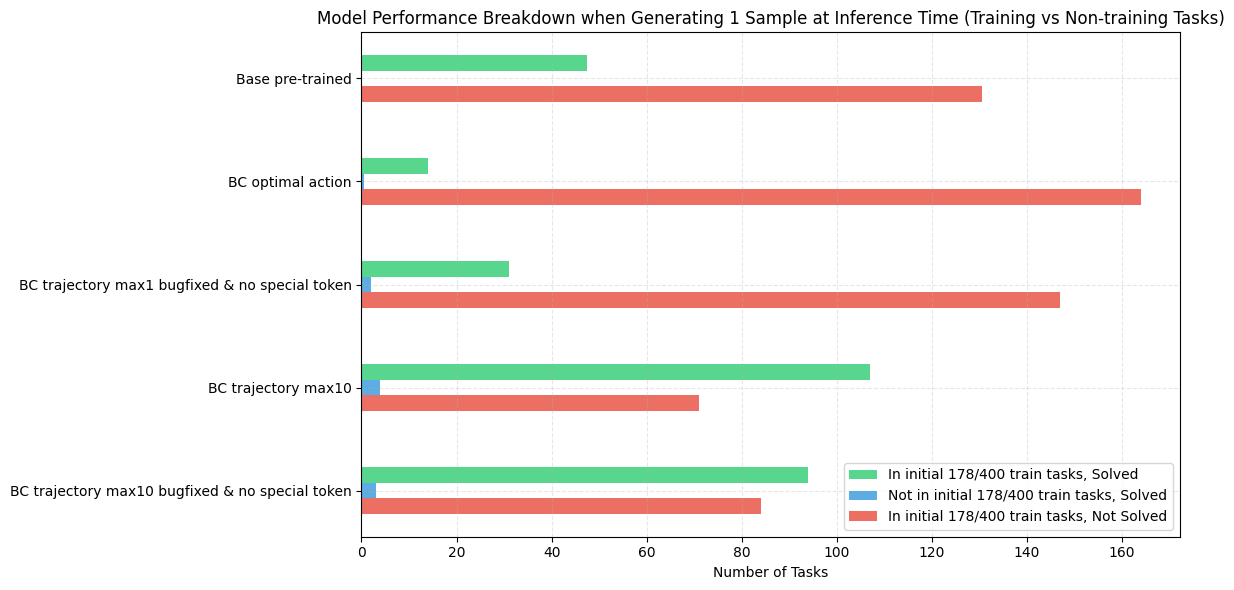

In [94]:
def plot_training_set_performance(models_results: Dict[str, Dict[int, SuccessStats]], train_uids: Set[str]):
    plt.figure(figsize=(12, 6))
    
    model_styles = {
        'Base pre-trained': {'color': '#1f77b4', 'marker': 'o'},
        'BC optimal action': {'color': '#ff7f0e', 'marker': 'o'},
        'BC trajectory max1 bugfixed & no special token': {'color': '#9467bd', 'marker': '*'},
        'BC trajectory max10': {'color': '#2ca02c', 'marker': '*'},
        'BC trajectory max10 bugfixed & no special token': {'color': '#d62728', 'marker': '*'},
    }
    
    x = np.array([1, 6, 64])
    width = 0.15  # Width of bars
    model_positions = np.arange(len(model_styles))
    
    # For each number of samples
    for i, n_samples in enumerate([1]):  # We can extend this to [1, 6, 64] if needed
        intersect_values = []
        diff_values = []
        cdiff_values = []
        
        for model_name in model_styles.keys():
            if n_samples in models_results[model_name]:
                stats = models_results[model_name][n_samples]
                successful_uids = stats.successful_uids
                
                if not isinstance(successful_uids, set):
                    # Calculate averages for multiple trials
                    avg_intersect = np.mean([len(train_uids & sample) for sample in successful_uids])
                    avg_diff = np.mean([len(sample - train_uids) for sample in successful_uids])
                    avg_cdiff = np.mean([len(train_uids - sample) for sample in successful_uids])
                else:
                    avg_intersect = len(train_uids & successful_uids)
                    avg_diff = len(successful_uids - train_uids)
                    avg_cdiff = len(train_uids - successful_uids)
                
                intersect_values.append(avg_intersect)
                diff_values.append(avg_diff)
                cdiff_values.append(avg_cdiff)
            else:
                intersect_values.append(0)
                diff_values.append(0)
                cdiff_values.append(0)
        
        # Create grouped bars
        plt.barh(model_positions - width, intersect_values, width, 
               label='In initial 178/400 train tasks, Solved', alpha=0.8, color='#2ecc71')
        plt.barh(model_positions, diff_values, width,
               label='Not in initial 178/400 train tasks, Solved', alpha=0.8, color='#3498db')
        plt.barh(model_positions + width, cdiff_values, width,
               label='In initial 178/400 train tasks, Not Solved', alpha=0.8, color='#e74c3c')
    plt.gca().invert_yaxis()

    # plt.ylabel('Model')
    plt.xlabel('Number of Tasks')
    plt.title('Model Performance Breakdown when Generating 1 Sample at Inference Time (Training vs Non-training Tasks)')
    plt.yticks(model_positions, list(model_styles.keys()), ha='right')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the function
plot_training_set_performance(models_results, train_uids)

In [ ]:
# Get all successful UIDs from models_results
all_successful_uids = set()
for model_name, sample_results in models_results.items():
    for n_samples, stats in sample_results.items():
        all_successful_uids.update(stats.successful_uids)

print(f"Total unique successful UIDs across all models: {len(all_successful_uids)}")
print(f"Number of training UIDs: {len(train_uids)}")
print(f"Number of successful UIDs that were in training: {len(all_successful_uids & train_uids)}")
print(f"Number of successful UIDs that were not in training: {len(all_successful_uids - train_uids)}")


In [95]:
"9172f3a0" in train_uids

True

In [104]:
# Examine messages for these UIDs from trajectory models
for model_name, sample_results in models_results.items():
    if 'trajectory' not in model_name.lower():
        continue
        
    print(f"\nModel: {model_name}")
    print("=" * 80)
    
    file_paths = sample_results[1].file_path
    if isinstance(file_paths, str):
        file_paths = [file_paths]
    data = []
    for path in file_paths:
        data.extend(load_jsonl(path))
    
    for n_samples, stats in sample_results.items():
        uids_to_inspect = stats.successful_uids - train_uids
        if not uids_to_inspect:
            continue
            
        print(f"\nNumber of samples: {n_samples}")
        print(f"Number of novel successful UIDs: {len(uids_to_inspect)}")
        print("\nExample messages for first few UIDs:")
        
        # Print first 3 examples
        for uid in list(uids_to_inspect)[:3]:
            print(f"\n### UID: {uid}")
            d = [d for d in data if d['uid'] == uid][0]
            trajectory = d['trajectories'][0]
            for msg in trajectory['output_messages']:
                print('-'*50 + f"\nRole: {msg['role']}")
                print(f"Content: {msg['content']}\n" + '-'*50)



Model: BC trajectory max10

Number of samples: 1
Number of novel successful UIDs: 4

Example messages for first few UIDs:

### UID: 40853293
--------------------------------------------------
Role: assistant
Content: Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:
```python
from common import *

import numpy as np
from typing import *

# concepts:
# color matching, radial lines

# description:
# In the input, you will see pairs of colored pixels on a black background. Each pair consists of two pixels of the same color located at different positions in the grid. 
# To create the output, draw a radial line from the first pixel of each pair to the second pixel of the same color. The radial line should be the same color as the pixels

In [3]:
"caa06a1f" in train_uids

False

In [5]:
import json
import numpy as np
traj_len = []
with open("../finetune/inference/responses/arc_problems_train_400_extra_newline_v2_potpourri-8b-inst-fft-induction-bc-trajectory-max10-per-task-warm-start_temp_0.8_1120143730149406.jsonl") as f:
    for line in f:
        d = json.loads(line)
        trajectories = d["trajectories"]
        for t in trajectories:
            traj_len.append(len(t["output_messages"]) // 2)
            
print(np.mean(traj_len), np.std(traj_len))

5.15 1.6815171720800235


In [7]:
import json

d = [ { "content": "You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.", "role": "system" }, { "content": "Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.\nHere are the input and output grids for the reference examples:\nExample 1\nInput:\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Gray Gray Gray Black Black Black\nGray Black Black Black Gray Gray Gray Gray Black Black\nGray Gray Gray Black Gray Gray Gray Gray Gray Black\nGray Gray Gray Black Black Gray Gray Gray Gray Black\nGray Black Black Black Black Black Gray Gray Gray Black\nBlack Black Black Black Black Black Black Black Black Black\n\nOutput:\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Blue Blue Blue Black Black Black\nRed Black Black Black Blue Blue Blue Blue Black Black\nRed Red Red Black Blue Blue Blue Blue Blue Black\nRed Red Red Black Black Blue Blue Blue Blue Black\nRed Black Black Black Black Black Blue Blue Blue Black\nBlack Black Black Black Black Black Black Black Black Black\n\n\nExample 2\nInput:\nBlack Black Black Gray Black Black Black Black Gray Gray\nBlack Black Gray Gray Gray Black Black Black Gray Gray\nBlack Gray Gray Gray Gray Gray Black Black Gray Gray\nBlack Black Gray Gray Gray Black Black Black Gray Gray\nBlack Black Black Gray Black Black Black Black Black Black\nBlack Black Black Black Black Gray Gray Gray Gray Gray\nBlack Black Gray Gray Black Black Gray Gray Gray Black\nBlack Black Gray Gray Gray Black Black Black Black Black\nBlack Black Gray Gray Gray Black Black Black Black Black\nBlack Black Gray Gray Black Black Black Black Black Black\n\nOutput:\nBlack Black Black Blue Black Black Black Black Red Red\nBlack Black Blue Blue Blue Black Black Black Red Red\nBlack Blue Blue Blue Blue Blue Black Black Red Red\nBlack Black Blue Blue Blue Black Black Black Red Red\nBlack Black Black Blue Black Black Black Black Black Black\nBlack Black Black Black Black Red Red Red Red Red\nBlack Black Gray Gray Black Black Red Red Red Black\nBlack Black Gray Gray Gray Black Black Black Black Black\nBlack Black Gray Gray Gray Black Black Black Black Black\nBlack Black Gray Gray Black Black Black Black Black Black\n\n\nExample 3\nInput:\nBlack Black Black Black Gray Black Black Black Black Black\nBlack Black Black Black Gray Gray Black Black Black Black\nGray Gray Black Black Gray Black Black Black Black Black\nGray Black Black Black Black Black Black Black Black Black\nGray Gray Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nGray Gray Gray Black Black Black Black Black Black Black\nGray Gray Gray Black Black Black Black Black Black Black\n\nOutput:\nBlack Black Black Black Red Black Black Black Black Black\nBlack Black Black Black Red Red Black Black Black Black\nGray Gray Black Black Red Black Black Black Black Black\nGray Black Black Black Black Black Black Black Black Black\nGray Gray Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlue Blue Blue Black Black Black Black Black Black Black\nBlue Blue Blue Black Black Black Black Black Black Black\n\n\nHere is the input grid for the test example:\nInput:\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black\nGray Gray Black Black Black Gray Gray Gray Black Black\nGray Gray Black Black Black Gray Gray Black Black Black\nGray Gray Black Black Black Gray Black Black Black Gray\nGray Gray Black Black Black Gray Black Black Gray Gray\nGray Gray Black Black Black Gray Gray Gray Gray Gray\nBlack Black Black Black Black Black Black Black Black Black\n\nWrite a Python function `transform` that can convert any given input grid to its corresponding output grid based on the pattern observed in the reference examples.", "role": "user" }, { "content": "Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:\n```python\nfrom common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# filling, color change, object detection\n\n# description:\n# In the input, you will see a grid with several gray objects. \n# To create the output, change the color of the largest object to blue and the smallest object to red.\n\ndef transform(input_grid):\n # Find connected components (objects) in the grid\n objects = find_connected_components(input_grid, background=Color.BLACK, connectivity=4, monochromatic=True)\n\n # Determine the areas of each object\n object_areas = [np.sum(obj != Color.BLACK) for obj in objects]\n\n # Identify the smallest and largest areas\n smallest_area = min(object_areas)\n largest_area = max(object_areas)\n\n # Create a new output grid initialized to the background color\n output_grid = np.full(input_grid.shape, Color.BLACK)\n\n # Change the color of the objects based on their size\n for obj in objects:\n area = np.sum(obj != Color.BLACK)\n if area == smallest_area:\n obj[obj != Color.BLACK] = Color.RED # Smallest object to red\n elif area == largest_area:\n obj[obj != Color.BLACK] = Color.BLUE # Largest object to blue\n \n # Place the modified object back into the output grid\n output_grid = blit_object(output_grid, obj, background=Color.BLACK)\n\n return output_grid\n```\n", "role": "assistant" } ]
for m in d:
    print('-'*50)
    print(m['role'])
    print('-'*50)
    print(m['content'])

--------------------------------------------------
system
--------------------------------------------------
You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.
--------------------------------------------------
user
--------------------------------------------------
Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.
Here are the input and output grids for the reference examples:
Example 1
Input:
Black Black Black Black Black Black Black Black Black Black
Black Black Black Black Black Black Black Black Black Black
Black Black Black Black Black Black Black Black Black Black
Black Black Black Black Black Black Black Black Black Black